# Writing prompts
In this notebook we will ask bob to write a prompt using itself.

In [1]:
import bia_bob

In [2]:
%%bob
Write a prompt for segmenting blobs.tif and quantiative image analysis.
I'm interested in differentiating phenotypes according to their shape.
Keep it simple though.

In [3]:
%%bob
* Load the image "blobs.tif".
* Segment the blobs in the image.
* Perform quantitative image analysis focusing on shape-based properties like area, perimeter, and eccentricity.
* Differentiate phenotypes based on the measured shape properties.
* Show the result.

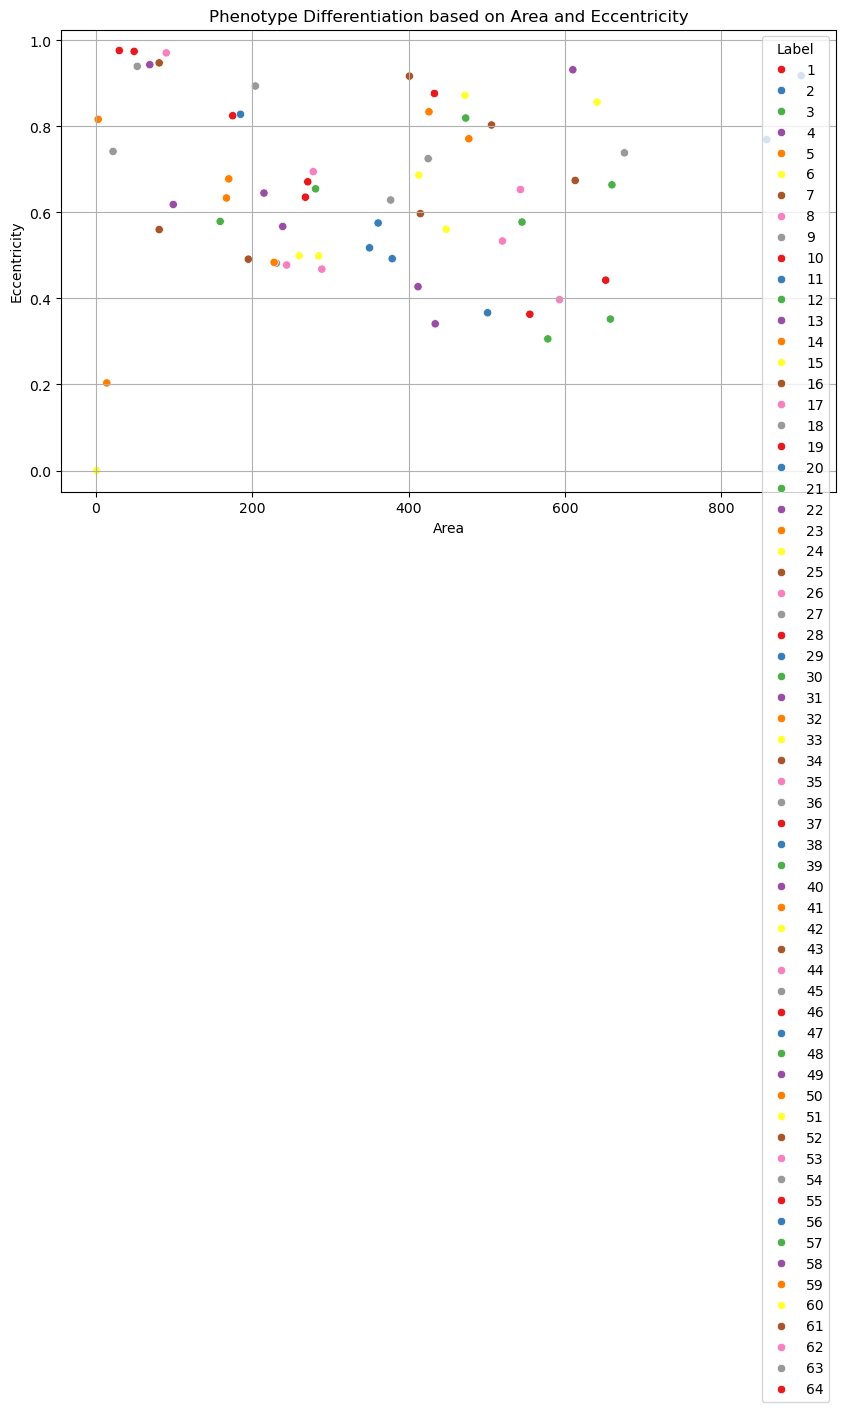

,label,area,perimeter,eccentricity
0,1,433.0,91.254834,0.876649
1,2,185.0,53.556349,0.828189
2,3,658.0,95.698485,0.352060
3,4,434.0,76.870058,0.341084
4,5,477.0,83.798990,0.771328


In [4]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the image "blobs.tif"
image = imread('blobs.tif')

# Step 2: Segment the blobs in the image using Otsu's thresholding
thresh = threshold_otsu(image)
binary_image = image > thresh

# Label the binary image
label_image = label(binary_image)

# Step 3: Perform quantitative image analysis focusing on shape-based properties
properties = ['label', 'area', 'perimeter', 'eccentricity']
measurements = regionprops_table(label_image, properties=properties)
df = pd.DataFrame(measurements)

# Step 4: Differentiate phenotypes based on the measured shape properties
# For simplicity, we'll plot area vs. eccentricity to differentiate phenotypes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='eccentricity', hue='label', palette='Set1')
plt.title('Phenotype Differentiation based on Area and Eccentricity')
plt.xlabel('Area')
plt.ylabel('Eccentricity')
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Show the DataFrame for inspection
df.head()

## Using prompts in code
You can also submit a prompt  (+ optional image) to the LLM directly from Python.
`%bob` can also show you how to do this.

In [5]:
%%bob
Write a for-loop that goes through 
all .png images in this folder, 
load them, 
show them, 
pass them to bob and 
ask it to describe the image.

In [6]:
import os
from skimage.io import imread
import stackview as sv
from bia_bob import ask_llm

# List all .png files in the current folder
png_files = [f for f in os.listdir('.') if f.endswith('.png')]

# Loop through all .png files
for file in png_files:
    # Load image
    image = imread(file)
    
    # Show image
    sv.insight(image)
    
    # Pass to bob and ask to describe the image
    prompt = "Describe this image."
    description = ask_llm(prompt, image=image)
    
    # Print the description
    print(f"Description for {file}:\n{description}\n")

Description for real_cat.png:
The image shows a white and black cat sitting upright on a wooden table beside or partially in front of a white microscope. The cat is looking to the right, and it appears to be calmly seated next to the microscope, creating a juxtaposition between the animal and the scientific instrument. The background includes a white wall and the edge of a red fabric, possibly from a piece of furniture like a chair or a blanket. The scene combines an element of curiosity or study with the presence of the cat and the microscope.

